In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.corr().T

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.637918,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
flight,0.637918,1.000000,-0.009443,0.071564,-0.118833,0.067175,-0.036248,-0.259531,0.205502,-0.000443,0.305872
source_city,-0.028350,-0.009443,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594
departure_time,0.056885,0.071564,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319
stops,-0.029838,-0.118833,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620
arrival_time,0.037714,0.067175,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043
destination_city,-0.030172,-0.036248,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795
class,-0.178862,-0.259531,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860
duration,-0.001651,0.205502,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222
days_left,-0.010678,-0.000443,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949


In [ ]:
df.shape

(300153, 11)

In [ ]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
3    704
1    218
2    205
4    186
5    133
0    115
Name: count, dtype: int64

<ipython-input-31-a920723e2b2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1['airline'],palette='hls')


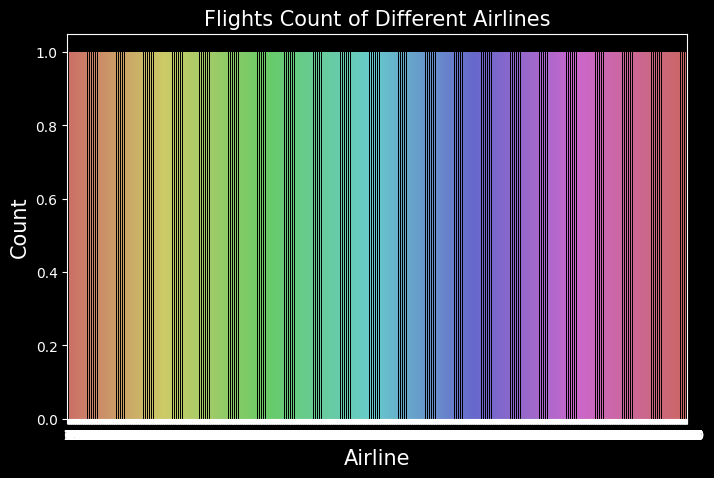

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [ ]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
1    1560
0     295
Name: count, dtype: int64

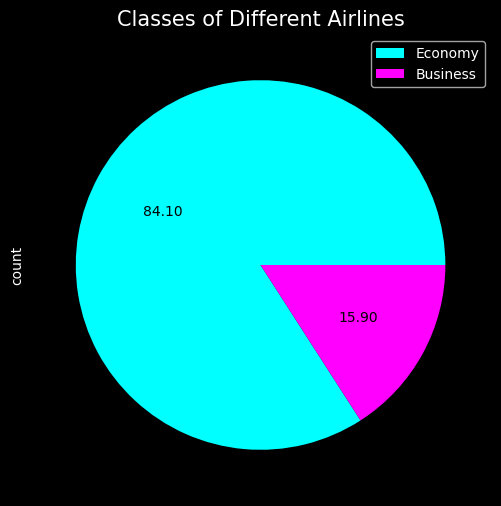

In [ ]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()


<ipython-input-34-7f35d7663c03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['airline'],y=df['price'],palette='hls')


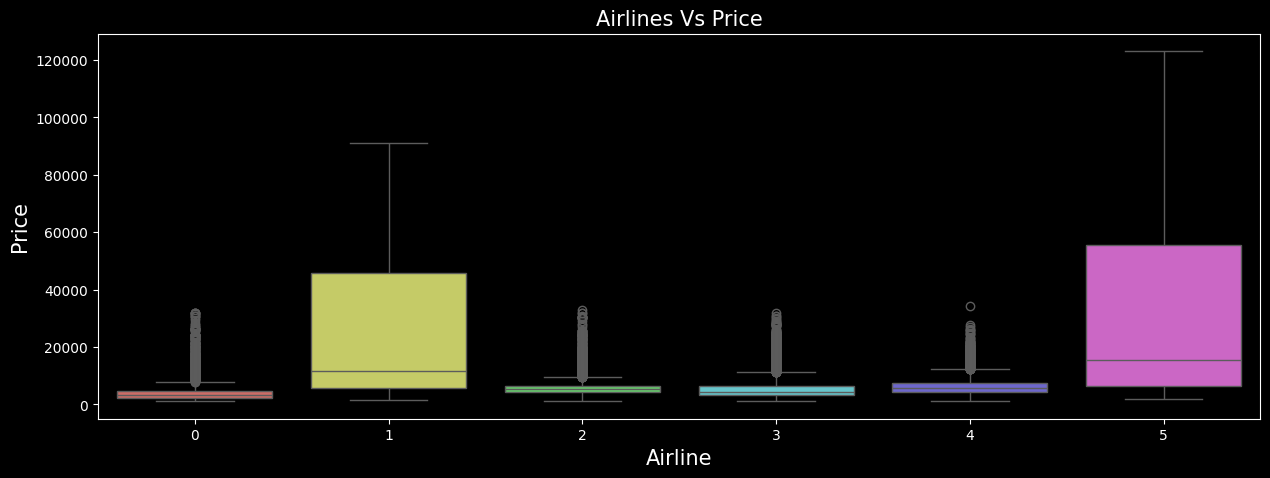

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<ipython-input-35-c6d4e46426f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='price',data=df,palette='hls')


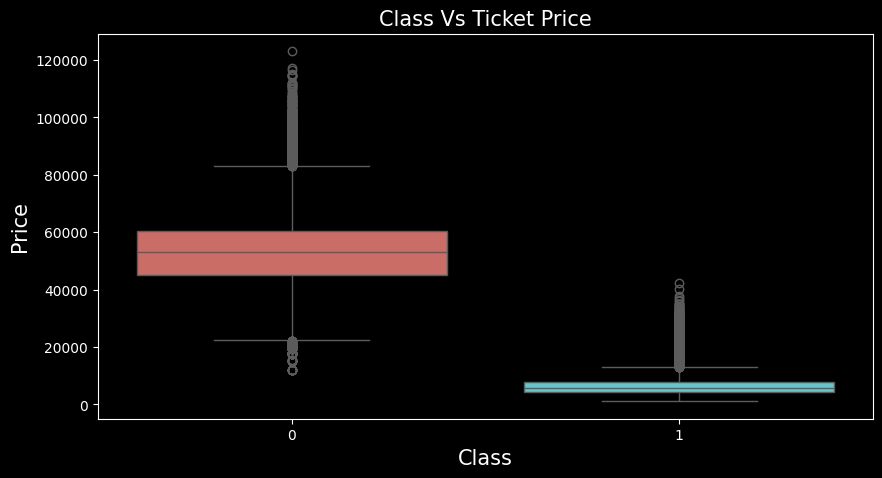

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<ipython-input-36-9a380a705a0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stops',y='price',data=df,palette='hls')


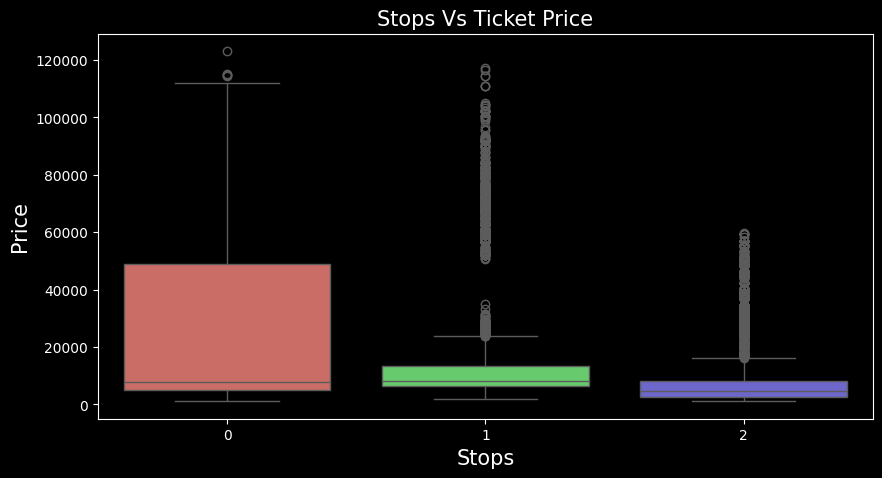

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<ipython-input-37-ad35089ce3d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')


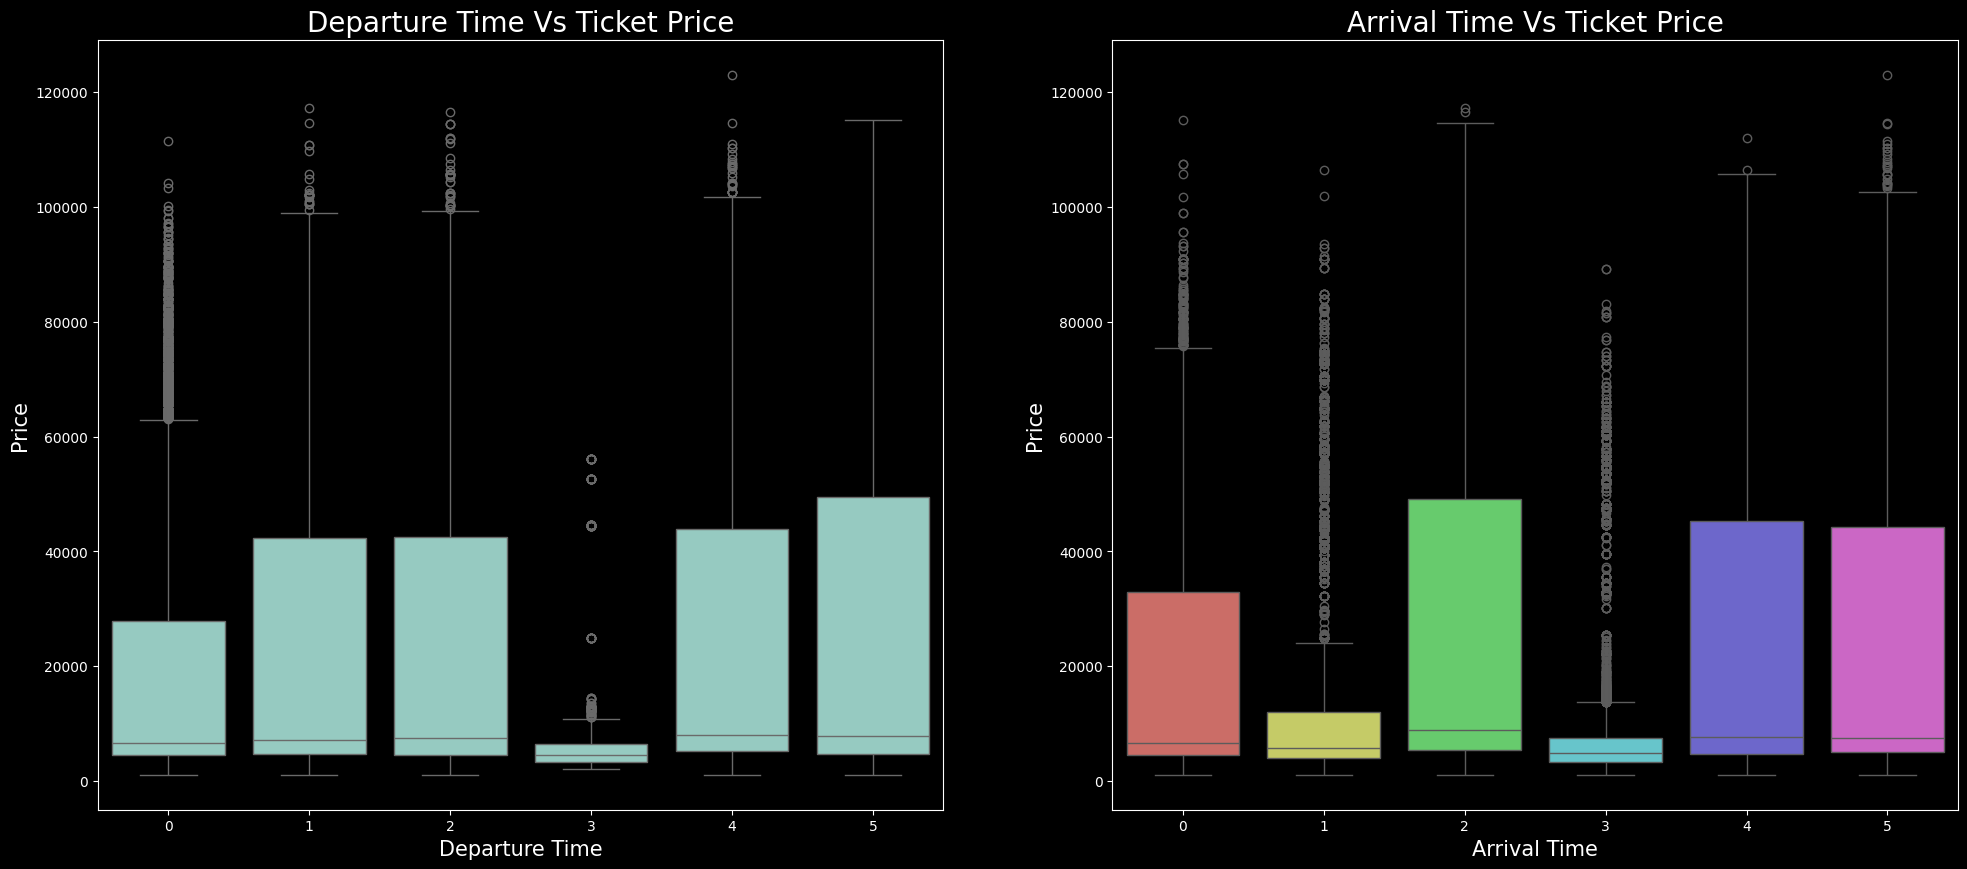

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<ipython-input-38-50ee13ac79b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destination_city',y='price',data=df,palette='hls')


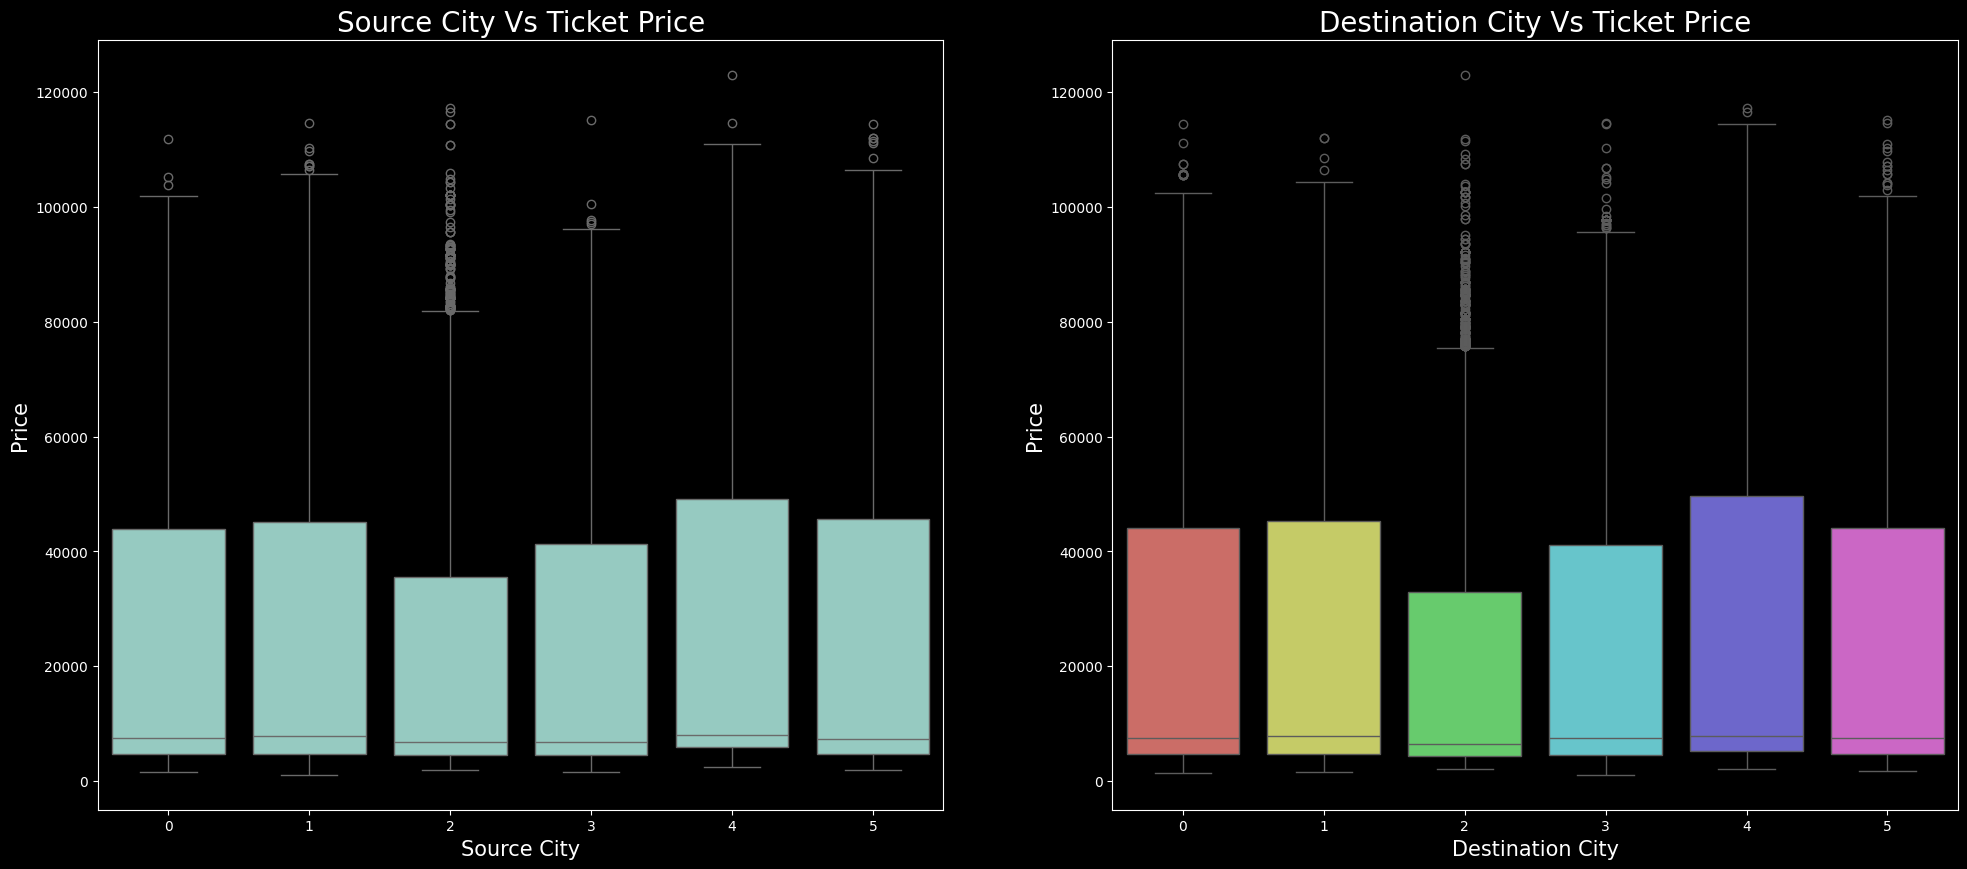

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

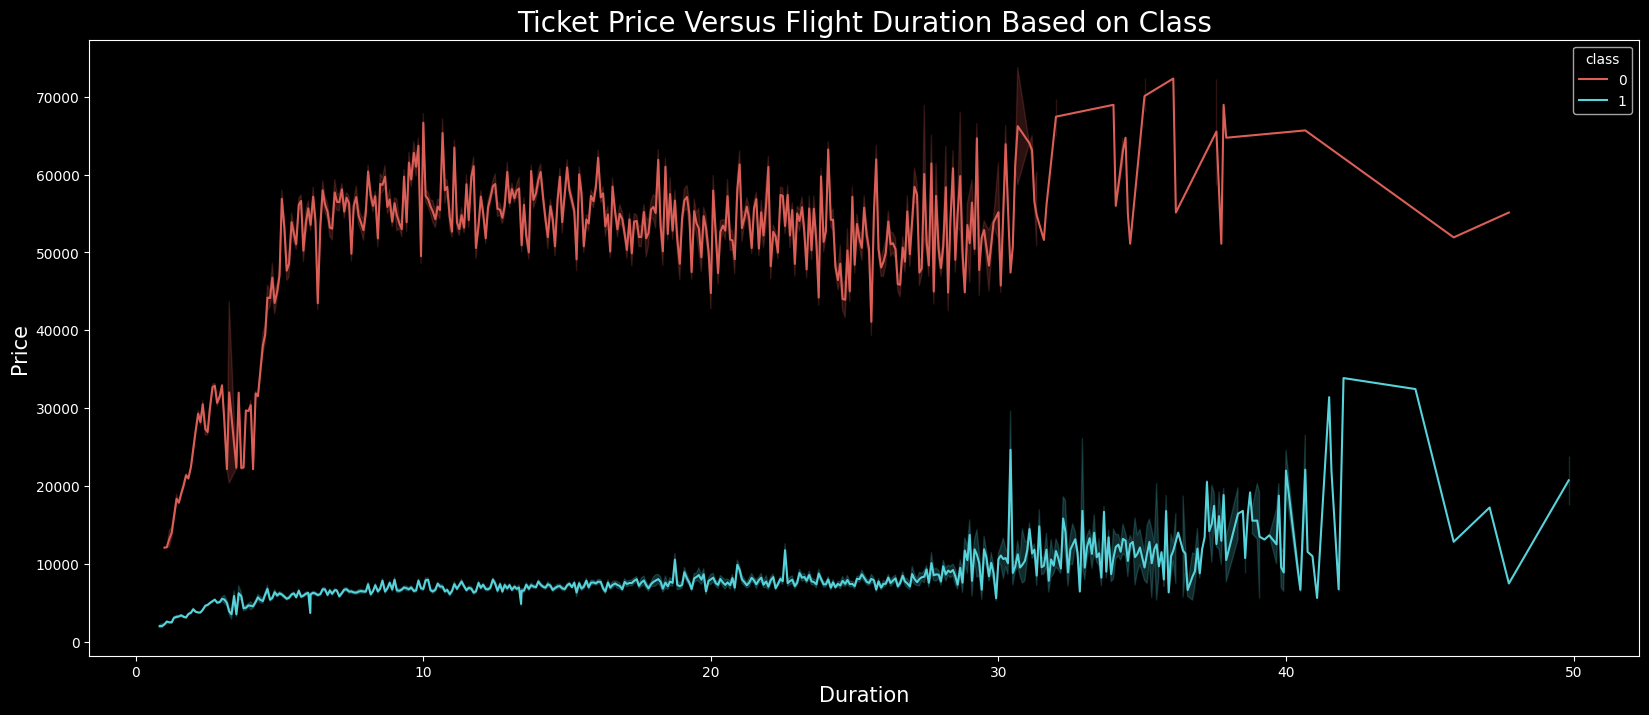

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


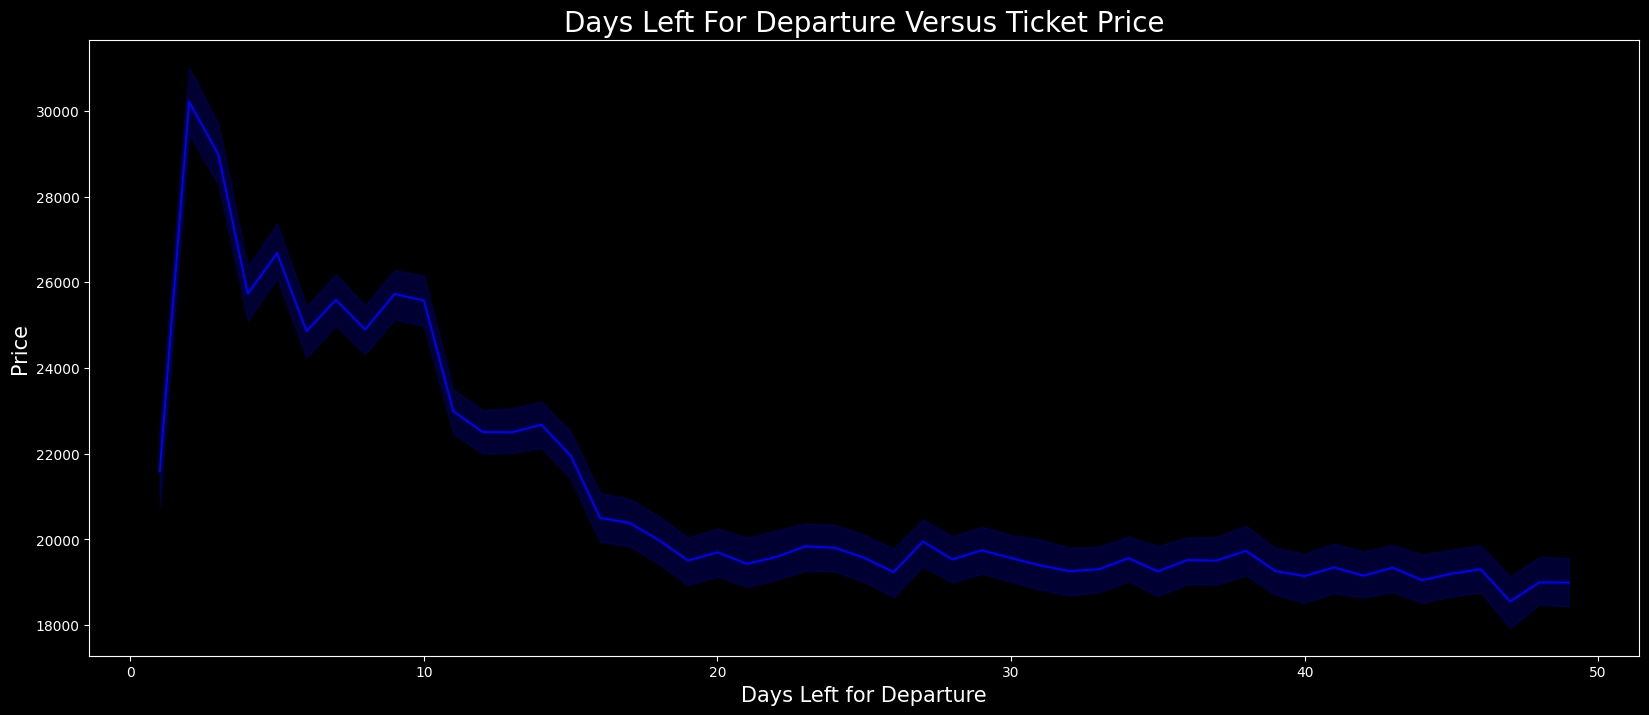

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

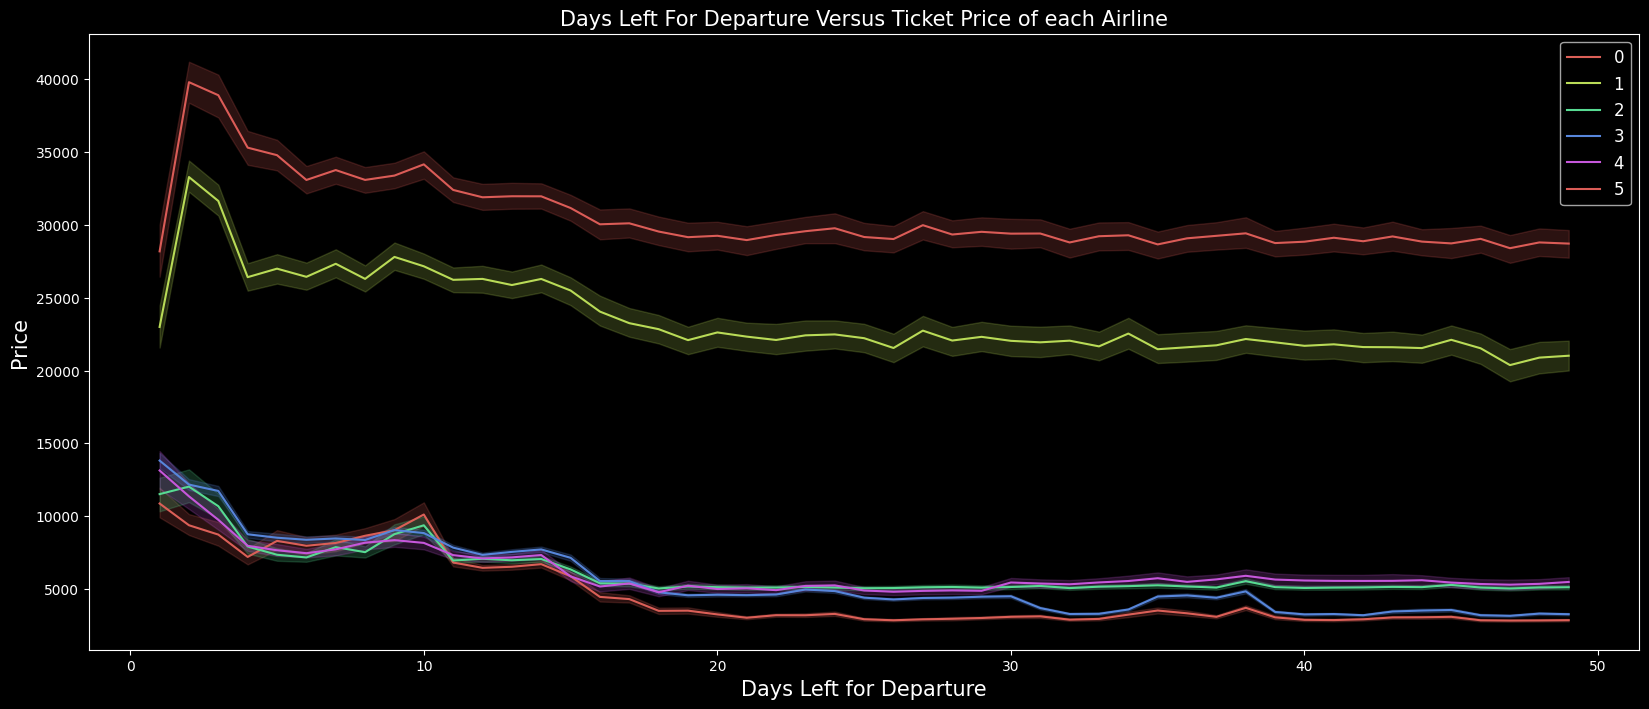

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,0,1,106
1,0,2,227
2,0,3,132
3,0,4,171
4,0,5,175
5,1,0,69
6,1,2,105
7,1,3,82
8,1,4,110
9,1,5,94


In [ ]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,0,0,1,2073.043478
1,0,0,2,4807.092426
2,0,0,3,2931.494792
3,0,0,4,4443.468160
4,0,0,5,3342.385350
5,0,1,0,1914.760870
6,0,1,2,3697.314003
7,0,1,3,2053.182540
8,0,1,4,3682.338762
9,0,1,5,2691.100000


In [ ]:
df_bk=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])


In [ ]:
x=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [ ]:
# Build the Regression / Regressor models

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import pandas as pd
import numpy as np

# Initialize an empty list to store results
results_list = []

# Create objects of Regression / Regressor models with default hyper-parameters

modelrfr = RandomForestRegressor()
modelXGR = xgb.XGBRegressor()
modelADA = AdaBoostRegressor()

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)


# Evalution matrix for all the algorithms

MM = [modelrfr, modelGBR, modelXGR, modelADA]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    # Define the result dictionary for the current model
    result_dict = {'Model Name': str(models),
                   'Mean_Absolute_Error_MAE': metrics.mean_absolute_error(y_test, y_pred),
                   'Adj_R_Square': adjusted_r_squared,
                   'Root_Mean_Squared_Error_RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                   'Mean_Absolute_Percentage_Error_MAPE': result,
                   'Mean_Squared_Error_MSE': metrics.mean_squared_error(y_test, y_pred),
                   'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
                   'R2_score': metrics.r2_score(y_test, y_pred)}

    # Append the result dictionary to the list
    results_list.append(result_dict)
    #-------------------------------------------------------------------------------------------

# Convert the list of dictionaries to a DataFrame
Results = pd.DataFrame(results_list)

# Print the results DataFrame
print(Results)

Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1166.465
Mean Squared Error (MSE): 8166026.599
Root Mean Squared Error (RMSE): 2857.626
R2_score: 0.984133
Root Mean Squared Log Error (RMSLE): 7.958
Mean Absolute Percentage Error (MAPE): 7.89 %
Adj R Square:  0.984132
------------------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 2808.07
Mean Squared Error (MSE): 22221138.851
Root Mean Squared Error (RMSE): 4713.93
R2_score: 0.956824
Root Mean Squared Log Error (RMSLE): 8.458
Mean Absolute Percentage Error (MAPE): 20.67 %
Adj R Square:  0.956823
------------------------------------------------------------------------------------------------------------
Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,


In [ ]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor(),1166.465311,0.984132,2857.626043,7.891771,8.166027e+06,7.957747,0.984133
1,GradientBoostingRegressor(),2808.070407,0.956823,4713.930298,20.673019,2.222114e+07,8.458277,0.956824
2,"XGBRegressor(base_score=None, booster=None, ca...",1862.407118,0.977303,3417.712919,14.232981,1.168076e+07,8.136727,0.977304
3,AdaBoostRegressor(),4303.916179,0.922667,6308.668300,44.221918,3.979930e+07,8.749680,0.922670


In [ ]:
models=['RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','AdaBoostRegressor' ]
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,0.984132,1166.465311,2857.626043,7.891771,8.166027e+06,7.957747,0.984133
1,XGBRegressor,0.977303,1862.407118,3417.712919,14.232981,1.168076e+07,8.136727,0.977304
2,GradientBoostingRegressor,0.956823,2808.070407,4713.930298,20.673019,2.222114e+07,8.458277,0.956824
3,AdaBoostRegressor,0.922667,4303.916179,6308.668300,44.221918,3.979930e+07,8.749680,0.922670


In [ ]:
#Trainig the model with
modelETR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [ ]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
193682,5,1486,1,1,0,5,5,1,15.75,48,4393,4393,4399.01
108105,1,903,0,0,0,4,4,1,16.83,39,3489,3489,3603.42
252467,1,745,0,2,0,4,5,0,16.33,45,54684,54684,54742.24
105125,4,1317,0,1,0,5,4,1,14.33,19,4814,4814,5021.59
203169,5,1488,1,2,0,4,3,1,16.50,8,15648,15648,16160.30
138156,0,1162,4,4,2,0,0,1,2.67,21,3862,3862,3921.45
15278,5,1546,2,2,0,5,0,1,5.08,27,4896,4896,4903.26
186313,5,1481,1,0,0,5,2,1,9.08,41,8803,8803,5797.82
105552,3,28,0,0,2,0,4,1,2.58,22,3912,3912,3795.91
76181,3,285,5,2,2,2,3,1,1.33,42,2901,2901,2901.00


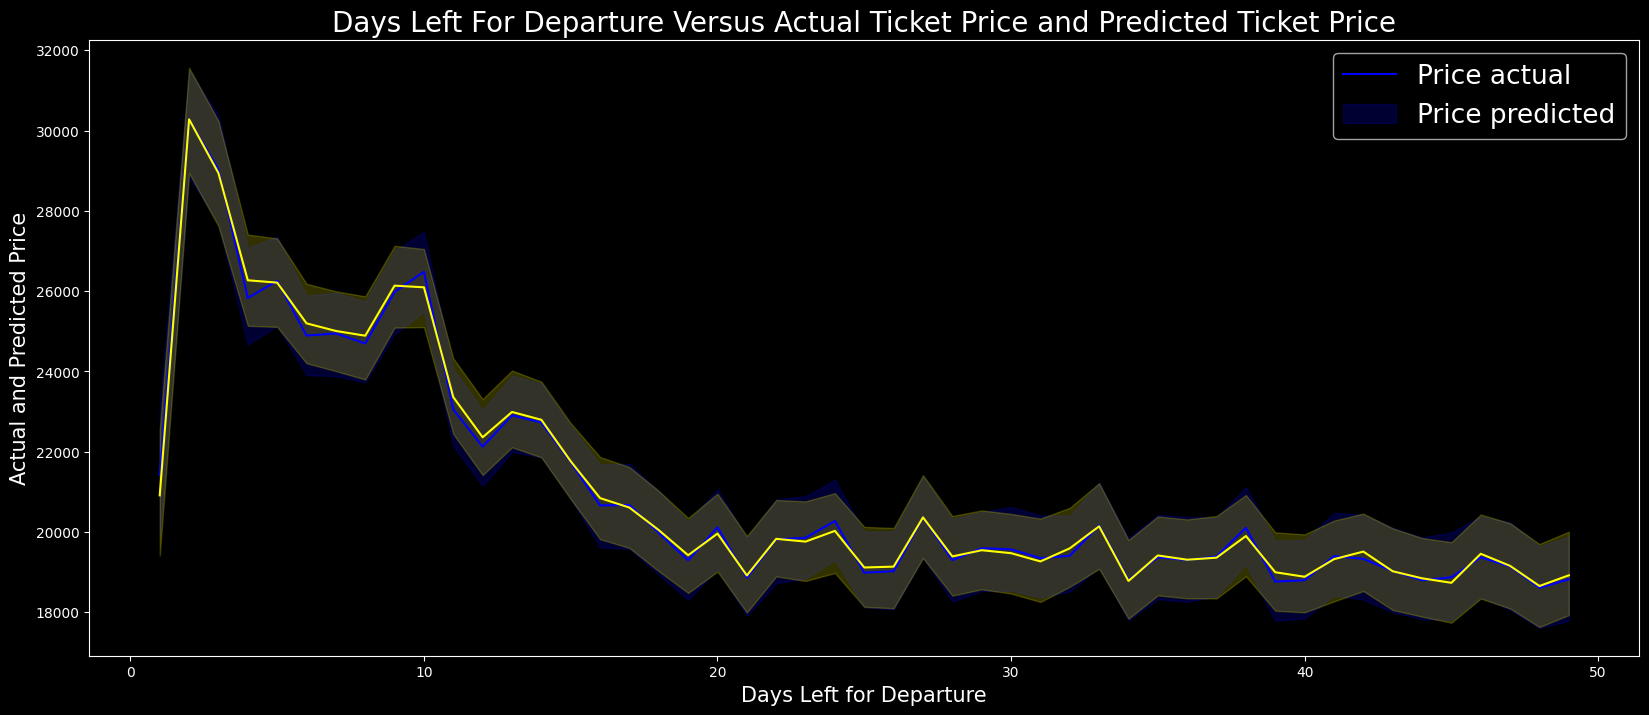

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='blue')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='yellow')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

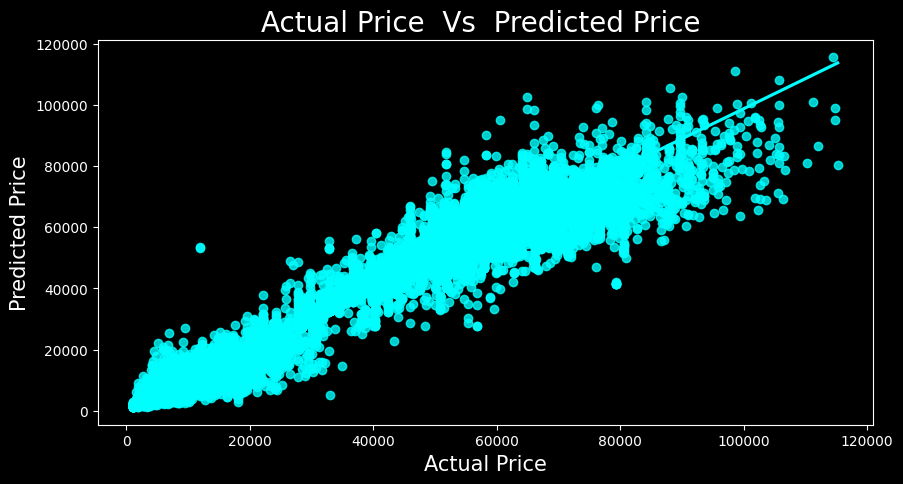

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

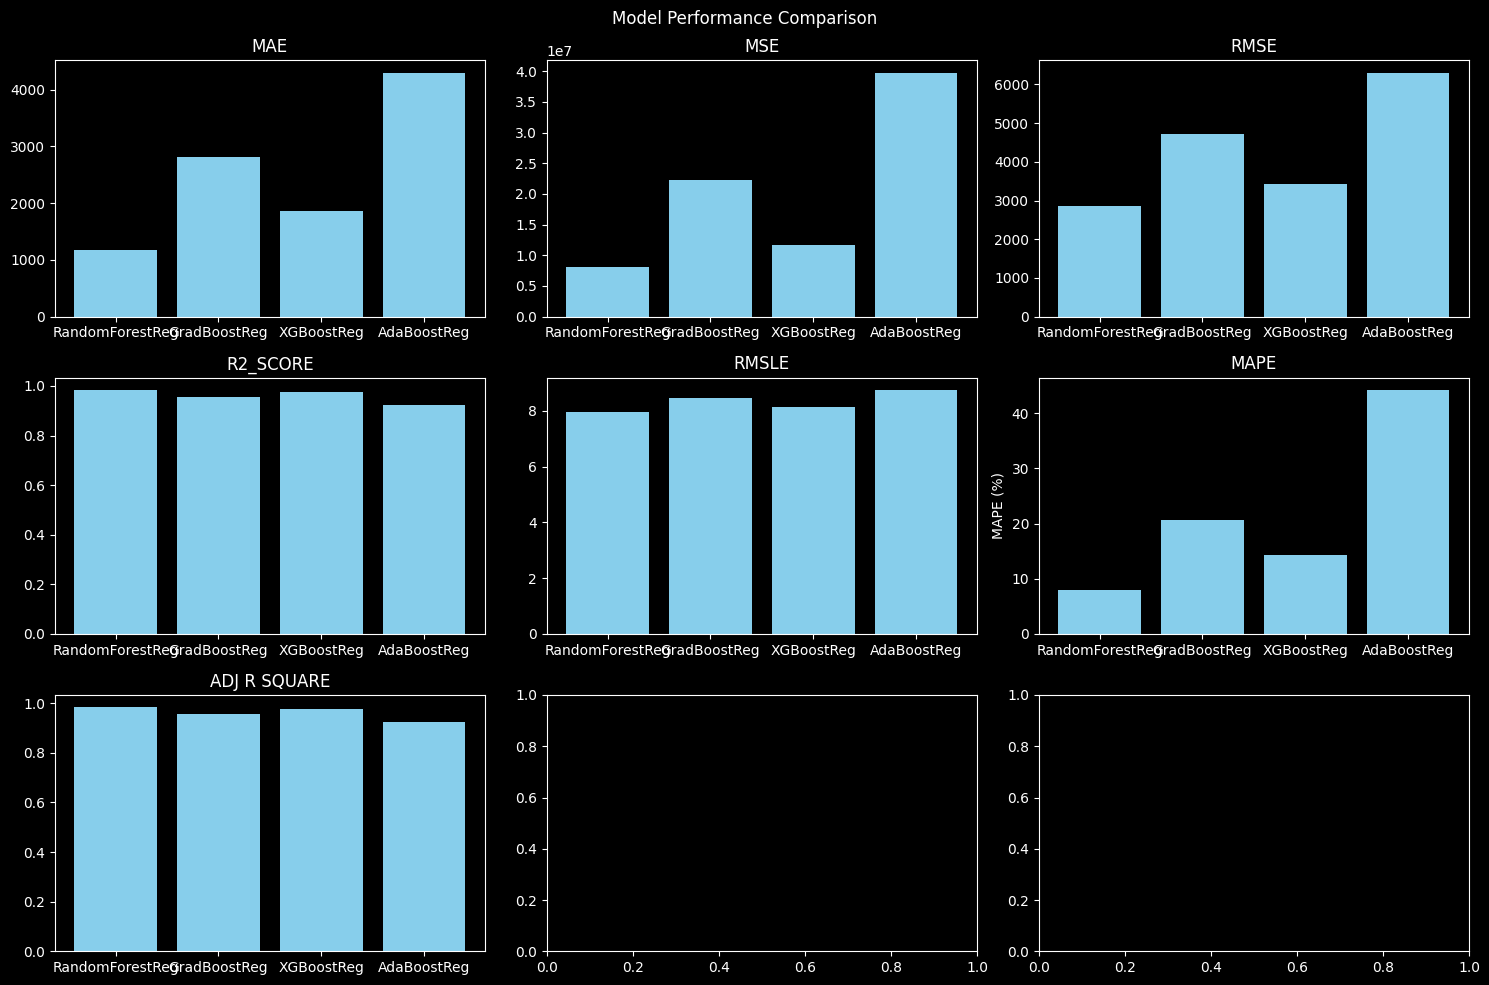

In [ ]:
import matplotlib.pyplot as plt

# Models
models = ['RandomForestReg', 'GradBoostReg', 'XGBoostReg', 'AdaBoostReg']

# Metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R2_SCORE', 'RMSLE', 'MAPE', 'ADJ R SQUARE']

# Results for each model and metric
results = {
    'RandomForestReg': [1166.465, 8166026.599, 2857.626, 0.984133, 7.958, '7.89%', 0.984132],
    'GradBoostReg': [2808.07, 22221138.851, 4713.93, 0.956824, 8.458, '20.67%', 0.956823],
    'XGBoostReg': [1862.407, 11680761.597, 3417.713, 0.977304, 8.137, '14.23%', 0.977303],
    'AdaBoostReg': [4303.916, 39799295.72, 6308.668, 0.92267, 8.75, '44.22%', 0.922667]
}

# Plotting
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Model Performance Comparison')

for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        ax = axs[j//3, j%3]
        if j == 5:  # Handling MAPE as a percentage
            ax.bar(model, float(results[model][j].replace('%', '')), color='skyblue')
            ax.set_ylabel('MAPE (%)')
        else:
            ax.bar(model, results[model][j], color='skyblue')
        ax.set_title(metric)

plt.tight_layout()
plt.show()


In [ ]:
#data sampling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # Ensure there are no invisible characters here

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Clean_Dataset.csv"
original_dataset = pd.read_csv(file_path)

# Specify the sample size
sample_size = 10000

# Randomly sample the DataFrame
random_sample = original_dataset.sample(n=sample_size, random_state=42)

# Print the selected rows
print("Randomly Sampled Rows:")
print(random_sample)

# Print the size of the table
print("\nSize of the Table (Number of Rows, Number of Columns):", random_sample.shape)

Randomly Sampled Rows:
        Unnamed: 0    airline  flight source_city departure_time stops  \
27131        27131  Air_India  AI-506       Delhi        Morning   one   
266857      266857    Vistara  UK-706     Kolkata        Morning   one   
141228      141228    Vistara  UK-772     Kolkata        Morning   one   
288329      288329    Vistara  UK-824     Chennai          Night   one   
97334        97334  Air_India  AI-501   Bangalore      Afternoon   one   
...            ...        ...     ...         ...            ...   ...   
27874        27874  Air_India  AI-803       Delhi  Early_Morning   one   
56233        56233   GO_FIRST  G8-575      Mumbai  Early_Morning   one   
98649        98649    Vistara  UK-814   Bangalore          Night   one   
250921      250921    Vistara  UK-854   Bangalore        Evening  zero   
244645      244645  Air_India  AI-660      Mumbai        Evening   one   

         arrival_time destination_city     class  duration  days_left  price  
27131   E

In [ ]:
sample_size = len(random_sample)
print("Size of Random Sample:", sample_size)

Size of Random Sample: 10000


In [ ]:
# Build the Regression / Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create objects of Regression / Regressor models with default hyper-parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelADA = AdaBoostRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evaluation matrix for all the algorithms
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO, modelADA]

for models in MM:
    # Fit the model with train data
    models.fit(x_train, y_train)
    # Predict the model with test data
    y_pred = models.predict(x_test)
    # Print the model name
    print('Model Name: ', models)
    # Evaluation metrics for Regression analysis
    from sklearn import metrics  # This line should be aligned with the rest of the code
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------


<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1254.864
Mean Squared Error (MSE): 13575411.352
Root Mean Squared Error (RMSE): 3684.483
R2_score: 0.973623
Root Mean Squared Log Error (RMSLE): 8.212
Mean Absolute Percentage Error (MAPE): 8.57 %
Adj R Square:  0.973622
------------------------------------------------------------------------------------------------------------


<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1172.572
Mean Squared Error (MSE): 8224445.524
Root Mean Squared Error (RMSE): 2867.829
R2_score: 0.98402
Root Mean Squared Log Error (RMSLE): 7.961
Mean Absolute Percentage Error (MAPE): 7.92 %
Adj R Square:  0.984019
------------------------------------------------------------------------------------------------------------


<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1853.747
Mean Squared Error (MSE): 14586829.596
Root Mean Squared Error (RMSE): 3819.271
R2_score: 0.971658
Root Mean Squared Log Error (RMSLE): 8.248
Mean Absolute Percentage Error (MAPE): 11.11 %
Adj R Square:  0.971657
------------------------------------------------------------------------------------------------------------


<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 1143.364
Mean Squared Error (MSE): 7840810.176
Root Mean Squared Error (RMSE): 2800.145
R2_score: 0.984765
Root Mean Squared Log Error (RMSLE): 7.937
Mean Absolute Percentage Error (MAPE): 7.65 %
Adj R Square:  0.984764
------------------------------------------------------------------------------------------------------------


<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 2808.069
Mean Squared Error (MSE): 22221132.303
Root Mean Squared Error (RMSE): 4713.93
R2_score: 0.956824
Root Mean Squared Log Error (RMSLE): 8.458
Mean Absolute Percentage Error (MAPE): 20.67 %
Adj R Square:  0.956823
------------------------------------------------------------------------------------------------------------


<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error (MAE): 1862.407
Mean Squared Error (MSE): 11680761.597
Root Mean Squared Error (RMSE): 3417.713
R2_score: 0.977304
Root Mean Squared Log Error (RMSLE): 8.137
Mean Absolute Percentage Error (MAPE): 14.23 %
Adj R Square:  

<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1206.453
Mean Squared Error (MSE): 8780913.002
Root Mean Squared Error (RMSE): 2963.261
R2_score: 0.982939
Root Mean Squared Log Error (RMSLE): 7.994
Mean Absolute Percentage Error (MAPE): 8.25 %
Adj R Square:  0.982938
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 4630.313
Mean Squared Error (MSE): 49070187.277
Root Mean Squared Error (RMSE): 7005.012
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 4630.179
Mean Squared Error (MSE): 49070111.63
Root Mean Squared Error (RMSE): 7005.006
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage E

<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  AdaBoostRegressor()
Mean Absolute Error (MAE): 4552.026
Mean Squared Error (MSE): 42283140.999
Root Mean Squared Error (RMSE): 6502.549
R2_score: 0.917844
Root Mean Squared Log Error (RMSLE): 8.78
Mean Absolute Percentage Error (MAPE): 49.87 %
Adj R Square:  0.917841
------------------------------------------------------------------------------------------------------------


<ipython-input-42-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Clean_Dataset.csv"
original_dataset = pd.read_csv(file_path)

# Specify the sample size
sample_size = 15000

# Randomly sample the DataFrame
random_sample = original_dataset.sample(n=sample_size, random_state=42)

# Print the selected rows
print("Randomly Sampled Rows:")
print(random_sample)

# Print the size of the table
print("\nSize of the Table (Number of Rows, Number of Columns):", random_sample.shape)

Randomly Sampled Rows:
        Unnamed: 0    airline  flight source_city departure_time        stops  \
27131        27131  Air_India  AI-506       Delhi        Morning          one   
266857      266857    Vistara  UK-706     Kolkata        Morning          one   
141228      141228    Vistara  UK-772     Kolkata        Morning          one   
288329      288329    Vistara  UK-824     Chennai          Night          one   
97334        97334  Air_India  AI-501   Bangalore      Afternoon          one   
...            ...        ...     ...         ...            ...          ...   
34338        34338   GO_FIRST  G8-423       Delhi  Early_Morning         zero   
118524      118524    Vistara  UK-852   Bangalore        Morning  two_or_more   
293655      293655    Vistara  UK-822     Chennai        Morning          one   
173218      173218   GO_FIRST  G8-426   Hyderabad          Night          one   
120039      120039   GO_FIRST  G8-227     Kolkata  Early_Morning         zero   

    

In [ ]:
# Build the Regression / Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create objects of Regression / Regressor models with default hyper-parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelADA = AdaBoostRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evaluation matrix for all the algorithms
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO, modelADA]

for models in MM:
    # Fit the model with train data
    models.fit(x_train, y_train)
    # Predict the model with test data
    y_pred = models.predict(x_test)
    # Print the model name
    print('Model Name: ', models)
    # Evaluation metrics for Regression analysis
    from sklearn import metrics  # This line should be aligned with the rest of the code
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------


<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1261.18
Mean Squared Error (MSE): 13856706.883
Root Mean Squared Error (RMSE): 3722.46
R2_score: 0.973076
Root Mean Squared Log Error (RMSLE): 8.222
Mean Absolute Percentage Error (MAPE): 8.6 %
Adj R Square:  0.973075
------------------------------------------------------------------------------------------------------------


<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1171.713
Mean Squared Error (MSE): 8215134.024
Root Mean Squared Error (RMSE): 2866.206
R2_score: 0.984038
Root Mean Squared Log Error (RMSLE): 7.961
Mean Absolute Percentage Error (MAPE): 7.92 %
Adj R Square:  0.984037
------------------------------------------------------------------------------------------------------------


<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1853.747
Mean Squared Error (MSE): 14586829.596
Root Mean Squared Error (RMSE): 3819.271
R2_score: 0.971658
Root Mean Squared Log Error (RMSLE): 8.248
Mean Absolute Percentage Error (MAPE): 11.11 %
Adj R Square:  0.971657
------------------------------------------------------------------------------------------------------------


<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 1146.05
Mean Squared Error (MSE): 7837292.323
Root Mean Squared Error (RMSE): 2799.516
R2_score: 0.984772
Root Mean Squared Log Error (RMSLE): 7.937
Mean Absolute Percentage Error (MAPE): 7.65 %
Adj R Square:  0.984771
------------------------------------------------------------------------------------------------------------


<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 2808.074
Mean Squared Error (MSE): 22221138.745
Root Mean Squared Error (RMSE): 4713.93
R2_score: 0.956824
Root Mean Squared Log Error (RMSLE): 8.458
Mean Absolute Percentage Error (MAPE): 20.67 %
Adj R Square:  0.956823
------------------------------------------------------------------------------------------------------------


<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error (MAE): 1862.407
Mean Squared Error (MSE): 11680761.597
Root Mean Squared Error (RMSE): 3417.713
R2_score: 0.977304
Root Mean Squared Log Error (RMSLE): 8.137
Mean Absolute Percentage Error (MAPE): 14.23 %
Adj R Square:  

<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1203.177
Mean Squared Error (MSE): 8677981.634
Root Mean Squared Error (RMSE): 2945.841
R2_score: 0.983139
Root Mean Squared Log Error (RMSLE): 7.988
Mean Absolute Percentage Error (MAPE): 8.22 %
Adj R Square:  0.983138
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 4630.313
Mean Squared Error (MSE): 49070187.277
Root Mean Squared Error (RMSE): 7005.012
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 4630.179
Mean Squared Error (MSE): 49070111.63
Root Mean Squared Error (RMSE): 7005.006
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage E

<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  AdaBoostRegressor()
Mean Absolute Error (MAE): 4420.759
Mean Squared Error (MSE): 41468109.615
Root Mean Squared Error (RMSE): 6439.574
R2_score: 0.919427
Root Mean Squared Log Error (RMSLE): 8.77
Mean Absolute Percentage Error (MAPE): 46.76 %
Adj R Square:  0.919424
------------------------------------------------------------------------------------------------------------


<ipython-input-44-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Clean_Dataset.csv"
original_dataset = pd.read_csv(file_path)

# Specify the sample size
sample_size = 20000

# Randomly sample the DataFrame
random_sample = original_dataset.sample(n=sample_size, random_state=42)

# Print the selected rows
print("Randomly Sampled Rows:")
print(random_sample)

# Print the size of the table
print("\nSize of the Table (Number of Rows, Number of Columns):", random_sample.shape)

Randomly Sampled Rows:
        Unnamed: 0    airline   flight source_city departure_time stops  \
27131        27131  Air_India   AI-506       Delhi        Morning   one   
266857      266857    Vistara   UK-706     Kolkata        Morning   one   
141228      141228    Vistara   UK-772     Kolkata        Morning   one   
288329      288329    Vistara   UK-824     Chennai          Night   one   
97334        97334  Air_India   AI-501   Bangalore      Afternoon   one   
...            ...        ...      ...         ...            ...   ...   
231025      231025    Vistara   UK-865      Mumbai        Evening  zero   
12314        12314   GO_FIRST   G8-113       Delhi  Early_Morning  zero   
18393        18393  Air_India   AI-409       Delhi        Morning   one   
145678      145678   SpiceJet  SG-3835     Kolkata          Night   one   
260931      260931    Vistara   UK-850   Bangalore        Evening   one   

         arrival_time destination_city     class  duration  days_left  price

In [ ]:
# Build the Regression / Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create objects of Regression / Regressor models with default hyper-parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelADA = AdaBoostRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evaluation matrix for all the algorithms
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO, modelADA]

for models in MM:
    # Fit the model with train data
    models.fit(x_train, y_train)
    # Predict the model with test data
    y_pred = models.predict(x_test)
    # Print the model name
    print('Model Name: ', models)
    # Evaluation metrics for Regression analysis
    from sklearn import metrics  # This line should be aligned with the rest of the code
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------


<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1260.886
Mean Squared Error (MSE): 13737064.083
Root Mean Squared Error (RMSE): 3706.355
R2_score: 0.973309
Root Mean Squared Log Error (RMSLE): 8.218
Mean Absolute Percentage Error (MAPE): 8.63 %
Adj R Square:  0.973308
------------------------------------------------------------------------------------------------------------


<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1170.774
Mean Squared Error (MSE): 8179078.244
Root Mean Squared Error (RMSE): 2859.909
R2_score: 0.984108
Root Mean Squared Log Error (RMSLE): 7.959
Mean Absolute Percentage Error (MAPE): 7.93 %
Adj R Square:  0.984107
------------------------------------------------------------------------------------------------------------


<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1853.747
Mean Squared Error (MSE): 14586829.596
Root Mean Squared Error (RMSE): 3819.271
R2_score: 0.971658
Root Mean Squared Log Error (RMSLE): 8.248
Mean Absolute Percentage Error (MAPE): 11.11 %
Adj R Square:  0.971657
------------------------------------------------------------------------------------------------------------


<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 1143.142
Mean Squared Error (MSE): 7771601.292
Root Mean Squared Error (RMSE): 2787.759
R2_score: 0.9849
Root Mean Squared Log Error (RMSLE): 7.933
Mean Absolute Percentage Error (MAPE): 7.62 %
Adj R Square:  0.984899
------------------------------------------------------------------------------------------------------------


<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 2808.072
Mean Squared Error (MSE): 22221148.587
Root Mean Squared Error (RMSE): 4713.931
R2_score: 0.956824
Root Mean Squared Log Error (RMSLE): 8.458
Mean Absolute Percentage Error (MAPE): 20.67 %
Adj R Square:  0.956823
------------------------------------------------------------------------------------------------------------


<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error (MAE): 1862.407
Mean Squared Error (MSE): 11680761.597
Root Mean Squared Error (RMSE): 3417.713
R2_score: 0.977304
Root Mean Squared Log Error (RMSLE): 8.137
Mean Absolute Percentage Error (MAPE): 14.23 %
Adj R Square:  

<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1207.237
Mean Squared Error (MSE): 8877772.827
Root Mean Squared Error (RMSE): 2979.559
R2_score: 0.98275
Root Mean Squared Log Error (RMSLE): 8.0
Mean Absolute Percentage Error (MAPE): 8.24 %
Adj R Square:  0.982749
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 4630.313
Mean Squared Error (MSE): 49070187.277
Root Mean Squared Error (RMSE): 7005.012
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 4630.179
Mean Squared Error (MSE): 49070111.63
Root Mean Squared Error (RMSE): 7005.006
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Erro

<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  AdaBoostRegressor()
Mean Absolute Error (MAE): 4037.434
Mean Squared Error (MSE): 36937509.159
Root Mean Squared Error (RMSE): 6077.624
R2_score: 0.92823
Root Mean Squared Log Error (RMSLE): 8.712
Mean Absolute Percentage Error (MAPE): 40.21 %
Adj R Square:  0.928228
------------------------------------------------------------------------------------------------------------


<ipython-input-46-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Clean_Dataset.csv"
original_dataset = pd.read_csv(file_path)

# Specify the sample size
sample_size = 25000

# Randomly sample the DataFrame
random_sample = original_dataset.sample(n=sample_size, random_state=42)

# Print the selected rows
print("Randomly Sampled Rows:")
print(random_sample)

# Print the size of the table
print("\nSize of the Table (Number of Rows, Number of Columns):", random_sample.shape)

Randomly Sampled Rows:
        Unnamed: 0    airline  flight source_city departure_time stops  \
27131        27131  Air_India  AI-506       Delhi        Morning   one   
266857      266857    Vistara  UK-706     Kolkata        Morning   one   
141228      141228    Vistara  UK-772     Kolkata        Morning   one   
288329      288329    Vistara  UK-824     Chennai          Night   one   
97334        97334  Air_India  AI-501   Bangalore      Afternoon   one   
...            ...        ...     ...         ...            ...   ...   
42173        42173   GO_FIRST  G8-275       Delhi        Evening   one   
148418      148418  Air_India  AI-770     Kolkata          Night   one   
71393        71393  Air_India  AI-660      Mumbai        Evening   one   
297888      297888    Vistara  UK-832     Chennai  Early_Morning   one   
189018      189018  Air_India  AI-430     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
27131   E

In [ ]:
# Build the Regression / Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create objects of Regression / Regressor models with default hyper-parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelADA = AdaBoostRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evaluation matrix for all the algorithms
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO, modelADA]

for models in MM:
    # Fit the model with train data
    models.fit(x_train, y_train)
    # Predict the model with test data
    y_pred = models.predict(x_test)
    # Print the model name
    print('Model Name: ', models)
    # Evaluation metrics for Regression analysis
    from sklearn import metrics  # This line should be aligned with the rest of the code
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------


<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1265.645
Mean Squared Error (MSE): 13916734.121
Root Mean Squared Error (RMSE): 3730.514
R2_score: 0.97296
Root Mean Squared Log Error (RMSLE): 8.224
Mean Absolute Percentage Error (MAPE): 8.61 %
Adj R Square:  0.972959
------------------------------------------------------------------------------------------------------------


<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1170.75
Mean Squared Error (MSE): 8185690.096
Root Mean Squared Error (RMSE): 2861.065
R2_score: 0.984095
Root Mean Squared Log Error (RMSLE): 7.959
Mean Absolute Percentage Error (MAPE): 7.92 %
Adj R Square:  0.984094
------------------------------------------------------------------------------------------------------------


<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1853.747
Mean Squared Error (MSE): 14586829.596
Root Mean Squared Error (RMSE): 3819.271
R2_score: 0.971658
Root Mean Squared Log Error (RMSLE): 8.248
Mean Absolute Percentage Error (MAPE): 11.11 %
Adj R Square:  0.971657
------------------------------------------------------------------------------------------------------------


<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 1143.751
Mean Squared Error (MSE): 7825214.203
Root Mean Squared Error (RMSE): 2797.358
R2_score: 0.984796
Root Mean Squared Log Error (RMSLE): 7.936
Mean Absolute Percentage Error (MAPE): 7.65 %
Adj R Square:  0.984795
------------------------------------------------------------------------------------------------------------


<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 2808.077
Mean Squared Error (MSE): 22221150.598
Root Mean Squared Error (RMSE): 4713.932
R2_score: 0.956824
Root Mean Squared Log Error (RMSLE): 8.458
Mean Absolute Percentage Error (MAPE): 20.67 %
Adj R Square:  0.956823
------------------------------------------------------------------------------------------------------------


<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error (MAE): 1862.407
Mean Squared Error (MSE): 11680761.597
Root Mean Squared Error (RMSE): 3417.713
R2_score: 0.977304
Root Mean Squared Log Error (RMSLE): 8.137
Mean Absolute Percentage Error (MAPE): 14.23 %
Adj R Square:  

<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1217.422
Mean Squared Error (MSE): 9105767.049
Root Mean Squared Error (RMSE): 3017.576
R2_score: 0.982307
Root Mean Squared Log Error (RMSLE): 8.012
Mean Absolute Percentage Error (MAPE): 8.21 %
Adj R Square:  0.982306
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 4630.313
Mean Squared Error (MSE): 49070187.277
Root Mean Squared Error (RMSE): 7005.012
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 4630.179
Mean Squared Error (MSE): 49070111.63
Root Mean Squared Error (RMSE): 7005.006
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage E

<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  AdaBoostRegressor()
Mean Absolute Error (MAE): 4021.449
Mean Squared Error (MSE): 37521897.886
Root Mean Squared Error (RMSE): 6125.512
R2_score: 0.927095
Root Mean Squared Log Error (RMSLE): 8.72
Mean Absolute Percentage Error (MAPE): 38.83 %
Adj R Square:  0.927093
------------------------------------------------------------------------------------------------------------


<ipython-input-48-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Clean_Dataset.csv"
original_dataset = pd.read_csv(file_path)

# Specify the sample size
sample_size = 30000

# Randomly sample the DataFrame
random_sample = original_dataset.sample(n=sample_size, random_state=42)

# Print the selected rows
print("Randomly Sampled Rows:")
print(random_sample)

# Print the size of the table
print("\nSize of the Table (Number of Rows, Number of Columns):", random_sample.shape)

Randomly Sampled Rows:
        Unnamed: 0    airline   flight source_city departure_time stops  \
27131        27131  Air_India   AI-506       Delhi        Morning   one   
266857      266857    Vistara   UK-706     Kolkata        Morning   one   
141228      141228    Vistara   UK-772     Kolkata        Morning   one   
288329      288329    Vistara   UK-824     Chennai          Night   one   
97334        97334  Air_India   AI-501   Bangalore      Afternoon   one   
...            ...        ...      ...         ...            ...   ...   
31717        31717   GO_FIRST  G8-7541       Delhi  Early_Morning   one   
208998      208998    Vistara   UK-829       Delhi  Early_Morning   one   
144093      144093   SpiceJet  SG-3835     Kolkata          Night   one   
256502      256502    Vistara   UK-846   Bangalore        Morning   one   
69746        69746   SpiceJet  SG-8152      Mumbai  Early_Morning   one   

         arrival_time destination_city     class  duration  days_left  price

In [ ]:
# Build the Regression / Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create objects of Regression / Regressor models with default hyper-parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelADA = AdaBoostRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evaluation matrix for all the algorithms
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO, modelADA]

for models in MM:
    # Fit the model with train data
    models.fit(x_train, y_train)
    # Predict the model with test data
    y_pred = models.predict(x_test)
    # Print the model name
    print('Model Name: ', models)
    # Evaluation metrics for Regression analysis
    from sklearn import metrics  # This line should be aligned with the rest of the code
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------


<ipython-input-50-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1264.063
Mean Squared Error (MSE): 13837207.35
Root Mean Squared Error (RMSE): 3719.84
R2_score: 0.973114
Root Mean Squared Log Error (RMSLE): 8.221
Mean Absolute Percentage Error (MAPE): 8.63 %
Adj R Square:  0.973113
------------------------------------------------------------------------------------------------------------


<ipython-input-50-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1172.029
Mean Squared Error (MSE): 8177840.272
Root Mean Squared Error (RMSE): 2859.692
R2_score: 0.98411
Root Mean Squared Log Error (RMSLE): 7.958
Mean Absolute Percentage Error (MAPE): 7.93 %
Adj R Square:  0.984109
------------------------------------------------------------------------------------------------------------


<ipython-input-50-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1853.747
Mean Squared Error (MSE): 14586829.596
Root Mean Squared Error (RMSE): 3819.271
R2_score: 0.971658
Root Mean Squared Log Error (RMSLE): 8.248
Mean Absolute Percentage Error (MAPE): 11.11 %
Adj R Square:  0.971657
------------------------------------------------------------------------------------------------------------


<ipython-input-50-15f01c8b0572>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd

# Assuming your data is in an Excel file
file_path = '/content/Book3.xlsx'
df = pd.read_excel(file_path)

# Display the loaded data
print(df)

                      MODELS       MAE           MSE      RMSE  R2_SCORE  \
0           LinearRegression  4630.296  4.907024e+07  7005.015  0.904656   
1      DecisionTreeRegressor  1257.709  1.371078e+07  3702.808  0.973360   
2                        KNN  1853.747  1.458683e+07  3819.271  0.971658   
3                      Lasso  4630.179  4.907011e+07  7005.006  0.904656   
4      RandomForestRegressor  1168.731  8.149063e+06  2854.656  0.984166   
5  GradientBoostingRegressor  2808.075  2.222114e+07  4713.931  0.956824   
6           XGBoostRegressor  1862.407  1.168076e+07  3417.713  0.977304   
7          ADABoostRegressor  3917.662  3.558806e+07  5965.573  0.930852   

   RMSLE    MAPE  ADJ R SQUARE  
0  8.854  0.4389      0.904653  
1  8.217  0.0861      0.973359  
2  8.248  0.1111      0.971657  
3  8.854  0.4389      0.904653  
4  7.957  0.0792      0.984165  
5  8.458  0.2067      0.956823  
6  8.137  0.1423      0.977303  
7  8.694  0.3783      0.930850  


ValueError: Could not interpret value `Models` for `x`. An entry with this name does not appear in `data`.

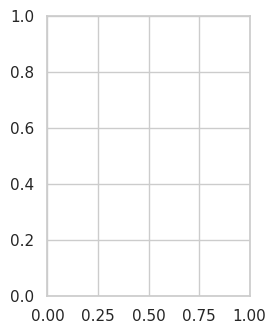

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the figure size
plt.figure(figsize=(12, 8))

# Column Chart (MAE)
plt.subplot(2, 4, 1)
sns.barplot(x="Models", y="MAE", data=df)
plt.xticks(rotation=90)
plt.title("Mean Absolute Error (MAE)")
